In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images (scale to 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension (28, 28) → (28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Optional regularization
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch 1/10
422/422 - 46s - 109ms/step - accuracy: 0.9012 - loss: 0.3213 - val_accuracy: 0.9810 - val_loss: 0.0687
Epoch 2/10
422/422 - 79s - 186ms/step - accuracy: 0.9684 - loss: 0.1060 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 3/10
422/422 - 42s - 99ms/step - accuracy: 0.9773 - loss: 0.0772 - val_accuracy: 0.9883 - val_loss: 0.0385
Epoch 4/10
422/422 - 81s - 192ms/step - accuracy: 0.9821 - loss: 0.0616 - val_accuracy: 0.9893 - val_loss: 0.0344
Epoch 5/10
422/422 - 42s - 99ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9897 - val_loss: 0.0338
Epoch 6/10
422/422 - 82s - 194ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9920 - val_loss: 0.0307
Epoch 7/10
422/422 - 42s - 99ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9905 - val_loss: 0.0310
Epoch 8/10
422/422 - 81s - 192ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9915 - val_loss: 0.0332
Epoch 9/10
422/422 - 41s - 98ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.99

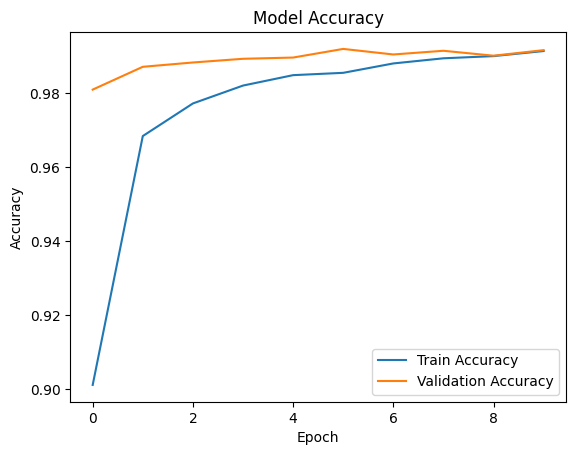

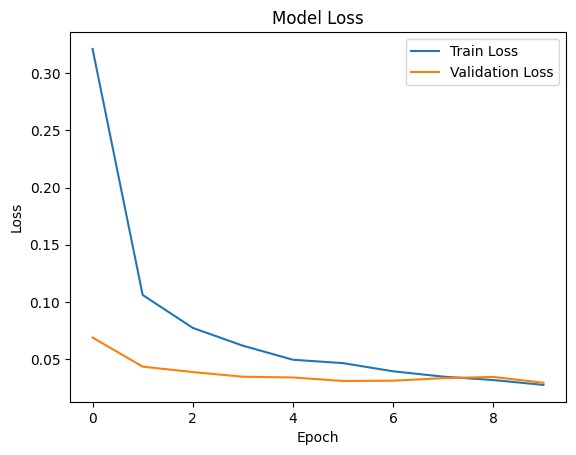

In [5]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


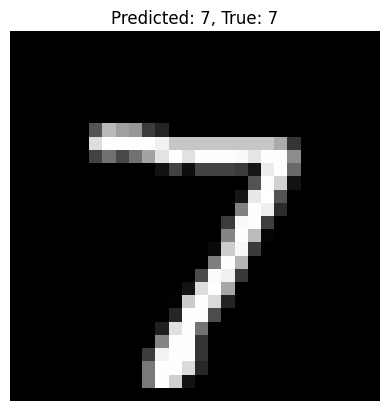

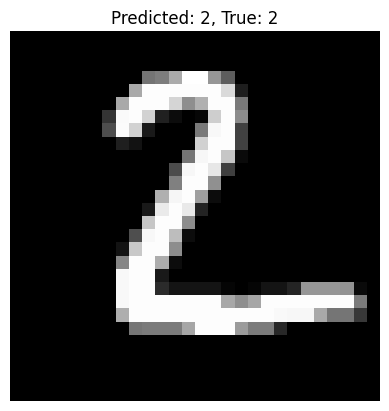

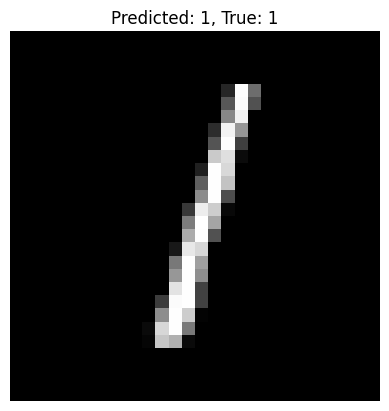

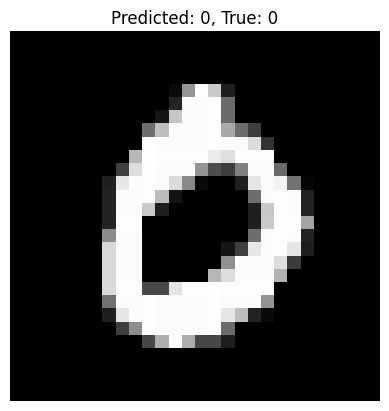

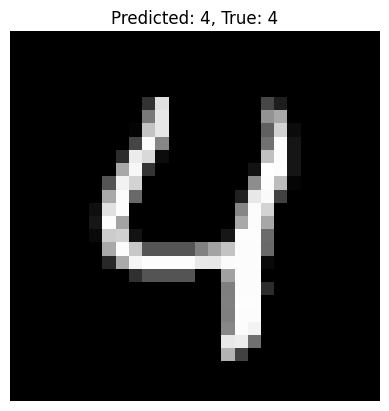

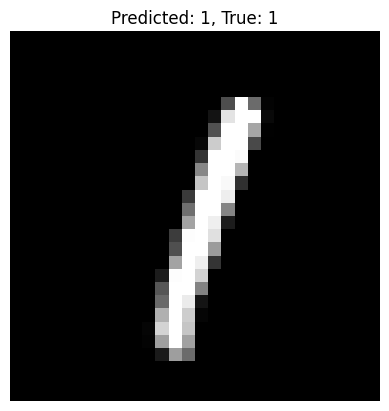

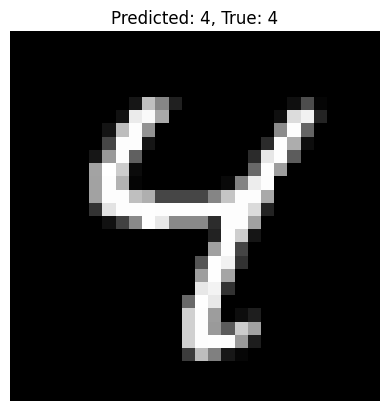

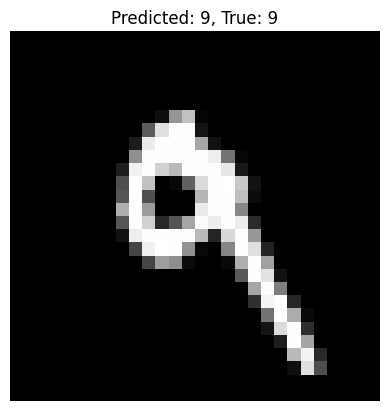

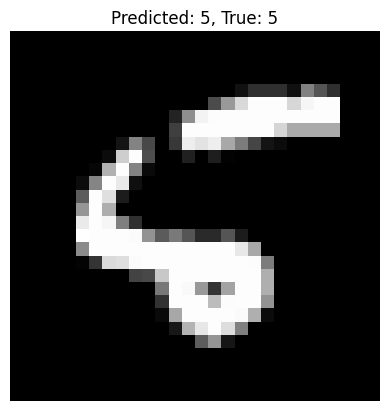

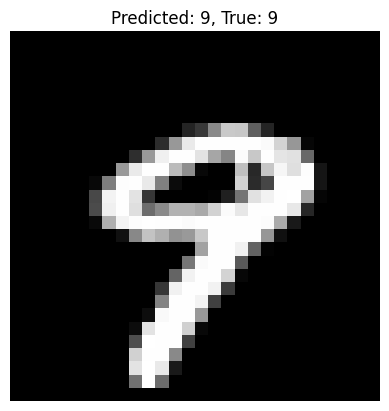

In [6]:
predictions = model.predict(x_test[:10])

for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()
